최근 급증한 주식인 NVIDIA를 보고 APPLE과 BITCOIN은 연관성이 있는지 확인해 보고 싶어 분석 프로젝트를 진행했다.

또한 NVIDIA와 APPLE의 주식이 미래에는 어떻게 변하게 될지 예측해본다.



In [1]:
#구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#맥 os 문제로 인하여 드라이브 연동 문제 해결을 위한 코드
#구글 드라이브의 work directory를 강제로 설정함
import os
os.getcwd()

os.chdir('/content/drive/MyDrive/')
os.getcwd()

'/content/drive/MyDrive'

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#각 해당하는 csv파일 불러오기
nvda= pd.read_csv('nvidia_data.csv')
appl= pd.read_csv('apple_data.csv')

# bitc은 천단위 콤마 표기로 인해 object로 인식하여 thousands 옵션을 활용
bitc= pd.read_csv('bitcoin_data.csv',thousands=',')

In [4]:
#data가 내림차순으로 되어 있어, data를 기준으로 오름차순으로 정렬 후 인덱스 정리
nvda.sort_values(by='data', inplace=True)
nvda.reset_index(drop=True, inplace=True)

appl.sort_values(by='data', inplace=True)
appl.reset_index(drop=True, inplace=True)

bitc.sort_values(by='data', inplace=True)
bitc.reset_index(drop=True, inplace=True)

In [5]:
bitc['same'] = ''    #빈 열 만들기

#bitc는 다른 두 데이터에 비하여 data값이 많아, 중복값만 남겨야 함
bitc['same'] = bitc['data'].isin(nvda['data'])
bitc= bitc[bitc['same']!=False]
bitc.drop(columns=['same'], inplace=True)

# 인덱스를 새롭게 번호를 매기기
bitc.reset_index(drop=True, inplace=True)
bitc

,data,closing_stock,opening_stock,high_stock,low_stock,trading_volume,stock_volatility
0,2020.1.10,8187.1,7842.5,8187.4,7697.7,1.05M,4.40%
1,2020.1.13,8111.4,8188.3,8196.7,8068.4,610.66K,-0.93%
2,2020.1.14,8829.2,8111.2,8898.7,8111.2,1.48M,8.85%
3,2020.1.15,8818.3,8827.9,8904.0,8615.5,1.17M,-0.12%
4,2020.1.16,8726.9,8818.1,8850.0,8605.8,748.32K,-1.04%
...,...,...,...,...,...,...,...
1111,2024.6.3,68807.8,67763.3,70131.0,67616.8,69.42K,1.53%
1112,2024.6.4,70549.2,68808.0,71034.2,68564.3,75.69K,2.53%
1113,2024.6.5,71083.7,70550.9,71744.4,70397.1,67.06K,0.76%
1114,2024.6.6,70791.5,71083.6,71616.1,70178.7,49.79K,-0.41%


In [6]:
# 후에 그래프에 활용하기 위하여 시가와 종가의 평균을 구하여 data별로 평균 값을 열 추가한다
nvda['avg']=(nvda['closing_stock']+nvda['opening_stock'])/2
appl['avg']=(appl['closing_stock']+appl['opening_stock'])/2
bitc['avg']=(bitc['closing_stock']+bitc['opening_stock'])/2

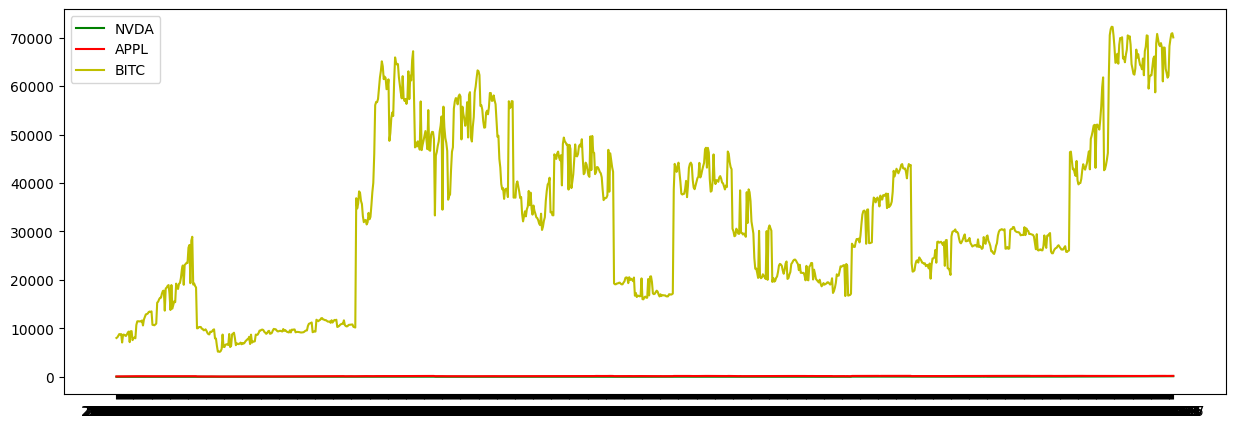

In [7]:
N_avg = nvda['avg']
A_avg = appl['avg']
B_avg = bitc['avg']
day = nvda['data']

fig = plt.figure(figsize=(15,5))
avg_plot = fig.add_subplot(111)
avg_plot.plot(day,N_avg,'g',label='NVDA')
avg_plot.plot(day,A_avg,'r',label='APPL')
avg_plot.plot(day,B_avg,'y',label='BITC')

avg_plot.legend()

plt.show()

위 그래프를 통해 비트코인은 값이 매우 크기 때문에 다른 두 값이 0에 수렴하는 것처럼 보인다.

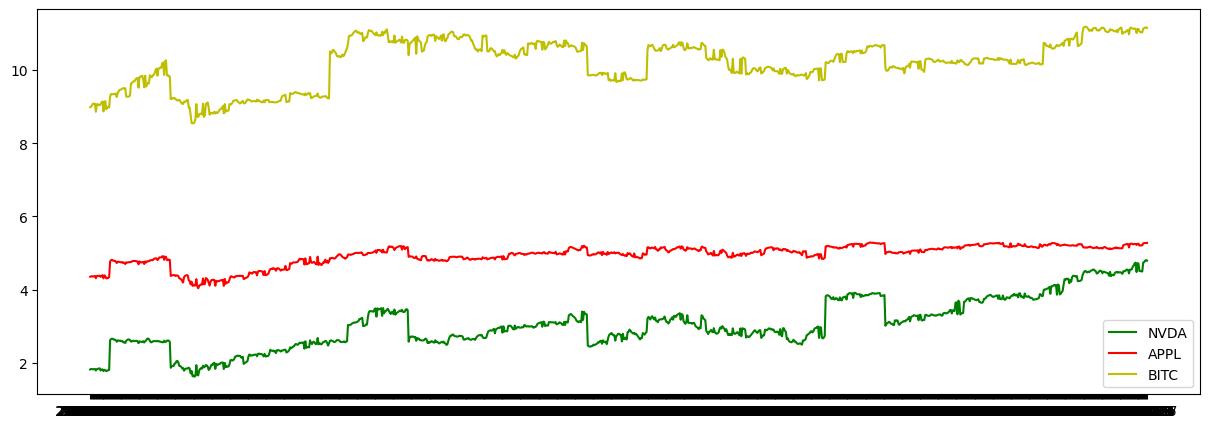

In [8]:
# 데이터의 로그 스케일로 변환
# 이는 bitc의 값이 너무 크기 때문에 로그 변환 진행

N_log_avg = N_avg.apply(lambda x: np.log(x))
A_log_avg = A_avg.apply(lambda x: np.log(x))
B_log_avg = B_avg.apply(lambda x: np.log(x))

fig = plt.figure(figsize=(15,5))
avg_plot = fig.add_subplot(111)
avg_plot.plot(day, N_log_avg, 'g', label='NVDA')
avg_plot.plot(day, A_log_avg, 'r', label='APPL')
avg_plot.plot(day, B_log_avg, 'y', label='BITC')

avg_plot.legend()

plt.show()

위의 그래프를 보고 그래프들이 일정한 주기를 가지고 급격한 상승과 급격한 하락을 반복하는 것이 확인된다.

또한 최근 NVIDIA와 APPLE의 주식이 비슷해지고 있는데 미래에는 NVIDIA가 APPLE의 주식을 뛰어 넘는지에 관해 예측해보겠다.

In [9]:
# 학습을 진행할 주식의 날짜와 하루 평균가를 추출하여 저장
n_train = pd.DataFrame()
n_train = nvda[['data','avg']]

a_train = pd.DataFrame()
a_train = appl[['data','avg']]

In [10]:

from prophet  import Prophet

# 프로핏 모델 객체 만들기
n = Prophet()
n_train = n_train.rename(columns={'data': 'ds', 'avg': 'y'})
n.fit(n_train)

a = Prophet()
a_train = a_train.rename(columns={'data': 'ds', 'avg': 'y'})
a.fit(a_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbksakdpx/vlmz97um.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbksakdpx/uslap3jv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23942', 'data', 'file=/tmp/tmpbksakdpx/vlmz97um.json', 'init=/tmp/tmpbksakdpx/uslap3jv.json', 'output', 'file=/tmp/tmpbksakdpx/prophet_modelavhnpqkm/prophet_model-20240612144848.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:48:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:48:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbk

In [11]:
# 예측 데이터프레임 준비
n_future = n.make_future_dataframe(periods=1000)
a_future = a.make_future_dataframe(periods=1000)

# 끝부분 확인
n_future.tail()
a_future.tail()

,ds
2111,2027-02-28
2112,2027-03-01
2113,2027-03-02
2114,2027-03-03
2115,2027-03-04


In [12]:
# 각 주식의 미래 예측
n_forecast = n.predict(n_future)
a_forecast = a.predict(a_future)

# 예측 결과 끝부분 확인
n_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
a_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2111,2027-02-28,197.692222,-6.195790,389.794194
2112,2027-03-01,194.193411,-8.488580,384.416396
2113,2027-03-02,193.774156,-10.618740,380.402680
2114,2027-03-03,193.361646,-12.852882,383.988827
2115,2027-03-04,192.774084,-9.721623,382.040640


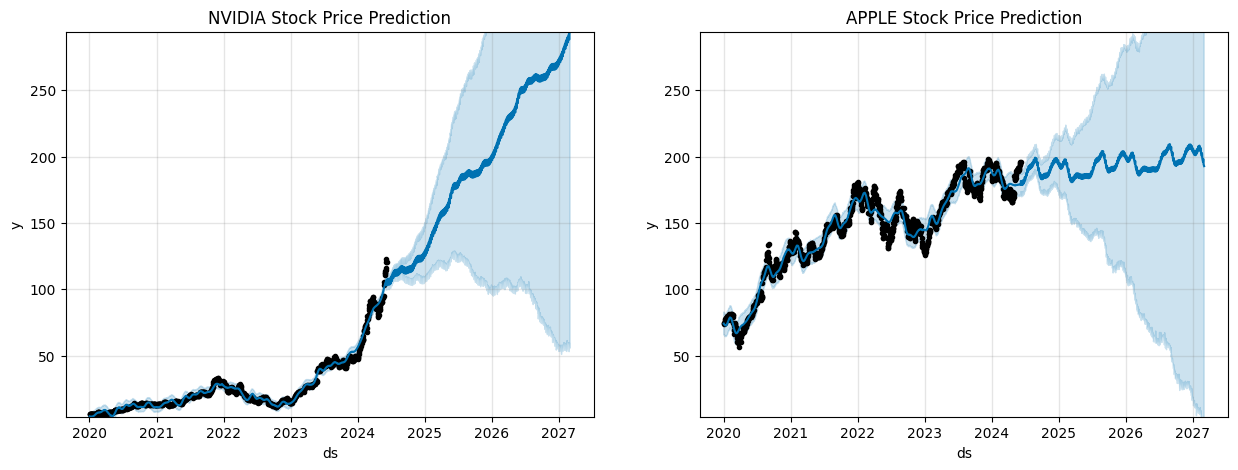

In [13]:
# 두 주식의 예측값 중 최소값과 최대값을 찾아서, 두 개의 그래프에 동일한 y축 범위를 설정
ymin = min(n_forecast['yhat'].min(), a_forecast['yhat'].min())
ymax = max(n_forecast['yhat'].max(), a_forecast['yhat'].max())

# 그래프 생성
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# NDIVIA의 주식 예측 결과
n_fig = n.plot(n_forecast, ax=ax1)
ax1.set_ylim(ymin, ymax)
ax1.set_title('NVIDIA Stock Price Prediction')

# APPLE의 주식 예측 결과
a_fig = a.plot(a_forecast, ax=ax2)
ax2.set_ylim(ymin, ymax)
ax2.set_title('APPLE Stock Price Prediction')

plt.show()

위 그래프를 통해 과거의 주식은 APPLE이 우세했다.

APPLE의 예측된 미래 주가는 현재와 큰 차이가 없을 것으로 예상된다.

반면, NDIVIA의 예측된 미래 주가는 최근의 주가 급상승과 비슷한 추세로 앞으로도 계속 상승할 것으로 보인다.